# Import Packages

In [62]:
import pandas as pd
import os
import glob
import numpy as np
import json
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn

# Import feat_dict

In [63]:
with open('feat_dict.json') as json_file:
    data = json.load(json_file)
data

{'adult_body_points': ['nose_x',
  'nose_y',
  'head_center_x',
  'head_center_y',
  'ear_left_x',
  'ear_left_y',
  'ear_right_x',
  'ear_right_y',
  'neck_x',
  'neck_y',
  'side_left_x',
  'side_left_y',
  'side_right_x',
  'side_right_y',
  'body_center_x',
  'body_center_y',
  'hip_left_x',
  'hip_left_y',
  'hip_right_x',
  'hip_right_y',
  'tailbase_x',
  'tailbase_y',
  'tail_tip_x',
  'tail_tip_y',
  'tail_center_x',
  'tail_center_y',
  'tail_upper_x',
  'tail_upper_y',
  'tail_lower_x',
  'tail_lower_y'],
 'adult_body_prob': ['nose_p',
  'head_center_p',
  'ear_left_p',
  'ear_right_p',
  'neck_p',
  'side_left_p',
  'side_right_p',
  'body_center_p',
  'hip_left_p',
  'hip_right_p',
  'tailbase_p',
  'tail_tip_p',
  'tail_center_p',
  'tail_upper_p',
  'tail_lower_p'],
 'infant_and_nest_points': ['Infant1_head_x',
  'Infant1_head_y',
  'Infant1_middle_head_x',
  'Infant1_middle_head_y',
  'Infant1_middle_tail_x',
  'Infant1_middle_tail_y',
  'Infant1_tail_x',
  'Infant1_tai

# Import feature dataframes

In [64]:
# Define features directory
features_directory = 'targets_inserted'
file_location = os.path.join(features_directory, '*.csv')

# create list of filenames for every video to be processed
# this list is the input for the video processing function
filenames = glob.glob(file_location)
videoname = []
for f in filenames:
    # establish name for output file from the input filename
    x = os.path.split(f)
    x = f
    videoname.append(x)
videoname

['targets_inserted\\Gal_35_father_retreive_trial_1.csv',
 'targets_inserted\\Gal_36_mother_built-nest-around-pups_trial_1.csv',
 'targets_inserted\\Gal_37_father_retreive_trial_1.csv',
 'targets_inserted\\Gal_38_mother_retreive_trial_1.csv',
 'targets_inserted\\Gal_49_virginfemale_retreive_trial_1.csv',
 'targets_inserted\\Gal_60_virginfemale_retreive_trial_1.csv',
 'targets_inserted\\Ucn3_46_virginfemale_ignore_trial_1.csv',
 'targets_inserted\\Ucn3_48_virginfemale_ignore_trial_1.csv',
 'targets_inserted\\Ucn3_50_father_retreive_trial_1.csv',
 'targets_inserted\\Ucn3_52_mother_retreive_trial_1.csv',
 'targets_inserted\\Ucn3_53_mother_retreive_trial_1.csv',
 'targets_inserted\\Ucn3_54_father_retreive_trial_1.csv']

In [65]:
# Read in the csv file for each feature dataframe
dfs = []
for x in videoname:
    filepath = x
    features = pd.read_csv(filepath)
    dfs.append(features)
    print(len(dfs))

1
2
3
4
5
6
7
8
9
10
11
12


# PCA

In [90]:
# Concatenate all the feature dataframes
feats_cat = pd.concat(dfs)

In [118]:
# Extract out the columns of the concatenated dataframe that are euclidean distance features for points within the
# adult body
euclid_dist_df = feats_cat[data['adult_distances']]
euclid_dist_df.head()

,nose_to_head_center,nose_to_ear_left,nose_to_ear_right,nose_to_neck,nose_to_side_left,nose_to_side_right,nose_to_body_center,nose_to_hip_left,nose_to_hip_right,nose_to_tailbase,...,tailbase_to_tail_tip,tailbase_to_tail_center,tailbase_to_tail_upper,tailbase_to_tail_lower,tail_tip_to_tail_center,tail_tip_to_tail_upper,tail_tip_to_tail_lower,tail_center_to_tail_upper,tail_center_to_tail_lower,tail_upper_to_tail_lower
0,0.720311,1.944876,1.298267,1.915739,3.536674,3.016875,3.804356,5.240306,5.318921,6.429433,...,4.742182,1.872228,3.177847,1.222547,3.699113,1.972723,5.059779,1.768328,1.475117,3.205081
1,0.822933,2.070490,1.348491,2.021263,3.669089,3.041237,3.895945,5.402098,5.348026,6.469717,...,4.928257,2.002773,3.349868,1.208512,3.644250,1.957637,5.053353,1.726963,1.504979,3.203162
2,0.823044,2.070432,1.348250,2.020055,3.665535,3.039522,3.892319,5.384813,5.357771,6.455624,...,4.955074,2.022162,3.375259,1.199854,3.646908,1.960590,5.063437,1.727447,1.515795,3.213303
3,0.840642,2.112067,1.320430,2.022660,3.710956,2.990928,3.883396,5.422232,5.303672,6.469149,...,4.929290,2.000136,3.346270,1.213232,3.673638,1.974299,5.070074,1.741107,1.498914,3.208442
4,0.843678,2.113358,1.328352,2.026989,3.710488,3.000350,3.895378,5.427561,5.300175,6.457045,...,4.953372,2.067229,3.396821,1.232423,3.617471,1.945616,5.062109,1.712120,1.546532,3.227620


In [119]:
# source : https://districtdatalabs.silvrback.com/principal-component-analysis-with-python

# Scale the euclidean distance dataframe
scaler = StandardScaler()
scaled_euclid = scaler.fit_transform(euclid_dist_df)

In [120]:
# Make a covariance matrix from the scaled data
cov_mat = np.cov(scaled_euclid.T)
print('NumPy covariance matrix: \n%s' %np.cov(scaled_euclid.T))

NumPy covariance matrix: 
[[ 1.00000445e+00  9.63864582e-01  9.66874243e-01 ... -3.44656301e-03
  -1.43836960e-02 -3.55756886e-04]
 [ 9.63864582e-01  1.00000445e+00  9.54715214e-01 ...  3.91759836e-03
  -9.10141870e-03  7.96238554e-03]
 [ 9.66874243e-01  9.54715214e-01  1.00000445e+00 ...  2.00156213e-04
  -1.31065507e-02  1.07352107e-02]
 ...
 [-3.44656301e-03  3.91759836e-03  2.00156213e-04 ...  1.00000445e+00
   3.06261610e-01  5.13449205e-01]
 [-1.43836960e-02 -9.10141870e-03 -1.31065507e-02 ...  3.06261610e-01
   1.00000445e+00  3.99337937e-01]
 [-3.55756886e-04  7.96238554e-03  1.07352107e-02 ...  5.13449205e-01
   3.99337937e-01  1.00000445e+00]]


In [121]:
#Perform eigendecomposition on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.01528289  0.0125904   0.06209458 ...  0.00899935  0.00916565
  -0.00678938]
 [-0.01799517  0.01433146  0.05004613 ...  0.02134512  0.00102689
  -0.00958428]
 [-0.01639237  0.00768822  0.06738055 ... -0.00199483 -0.01020356
  -0.02734961]
 ...
 [-0.0186472   0.06176862  0.02398391 ...  0.00033161  0.00154508
  -0.00060762]
 [-0.01272357  0.083048    0.04760081 ... -0.00097735  0.00744472
   0.00038261]
 [-0.03229308 -0.01953347  0.00080464 ...  0.00415695 -0.00514783
   0.00323296]]

Eigenvalues 
[4.08836277e+01 1.55316196e+01 6.92158524e+00 6.50083354e+00
 4.01964273e+00 3.62719392e+00 3.35794816e+00 2.50032853e+00
 1.72306093e+00 1.67275162e+00 1.55605230e+00 1.36215537e+00
 1.24494001e+00 1.12333812e+00 1.06971216e+00 9.99374111e-01
 9.02821317e-01 8.30019897e-01 7.51890941e-01 6.72190424e-01
 6.20043865e-01 5.71993414e-01 5.04133601e-01 4.74894689e-01
 4.35018224e-01 3.92757303e-01 3.63840380e-01 3.39274926e-01
 3.05665438e-01 2.90433793e-01 2.65681376e-01 2.44940

In [122]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
40.88362765272053
15.531619597881692
6.921585239149836
6.500833542998529
4.01964273257889
3.6271939170658567
3.357948160935861
2.5003285327725675
1.7230609284309082
1.6727516184117444
1.556052300643096
1.3621553717649224
1.2449400059206632
1.123338118874137
1.0697121563963659
0.9993741107974774
0.9028213171094699
0.8300198968292567
0.7518909405402519
0.6721904244654686
0.6200438654749374
0.571993414116
0.5041336006228718
0.47489468881082203
0.4350182239823671
0.3927573030999642
0.36384038028787613
0.33927492635139767
0.3056654376576131
0.2904337931058403
0.265681376340008
0.24494065363237974
0.22580479593234787
0.20316650419512589
0.18974267228023323
0.17380350561053878
0.14454976995854898
0.1601341597569242
0.1608621873349909
0.1268976710499024
0.12274062863756516
0.11403087969351333
0.10728996001677306
0.10113134009926271
0.08313741413320898
0.07993829944312504
0.07310551298792325
0.06885285557897172
0.06605998517107319
0.06088189933630144
0.057436780

# Scree Plot

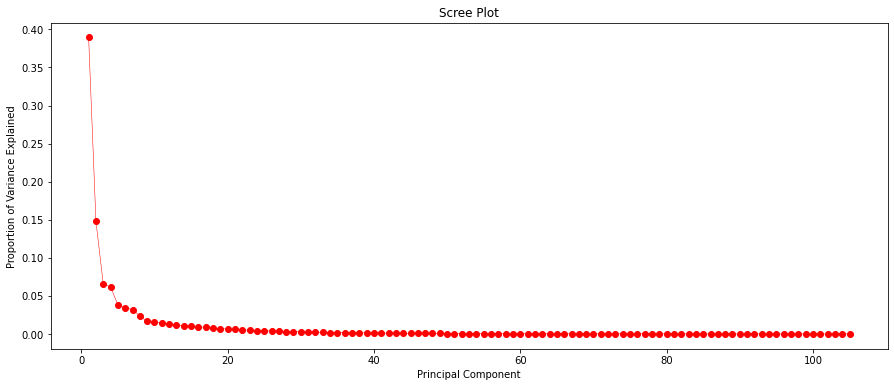

In [123]:
#Fit a PCA to the scaled_euclidean dataframe and make a scree plot
pca = PCA().fit(scaled_euclid)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(15,6))
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=0.5)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [124]:
# Find the minimum features that explain a certain amount of variance in the euclidean distance data
pca_thresholds = [0.5, 0.7, 0.8, 0.9, 0.95]
for i in range(len(pca_thresholds)):
    pca = PCA(pca_thresholds[i])
    pca.fit(scaled_euclid)
    print(pca_thresholds[i], pca.n_components_)

0.5 2
0.7 5
0.8 9
0.9 17
0.95 25


# Perform the same analysis as above but with any tail-related euclidean distances removed

In [125]:
columns_to_drop = []
for column in euclid_dist_df.columns:
    if ('tail_tip' in column or 'tail_center' in column or 
        'tail_upper' in column or 'tail_lower' in column):
        columns_to_drop.append(column)
euclid_dropped = euclid_dist_df.drop(columns_to_drop, axis=1)
euclid_dropped

,nose_to_head_center,nose_to_ear_left,nose_to_ear_right,nose_to_neck,nose_to_side_left,nose_to_side_right,nose_to_body_center,nose_to_hip_left,nose_to_hip_right,nose_to_tailbase,...,side_right_to_body_center,side_right_to_hip_left,side_right_to_hip_right,side_right_to_tailbase,body_center_to_hip_left,body_center_to_hip_right,body_center_to_tailbase,hip_left_to_hip_right,hip_left_to_tailbase,hip_right_to_tailbase
0,0.720311,1.944876,1.298267,1.915739,3.536674,3.016875,3.804356,5.240306,5.318921,6.429433,...,1.999576,4.275076,2.443915,4.593367,2.298442,2.160510,2.746858,3.862913,1.833330,3.141356
1,0.822933,2.070490,1.348491,2.021263,3.669089,3.041237,3.895945,5.402098,5.348026,6.469717,...,2.032946,4.306607,2.420874,4.615353,2.290180,2.186747,2.709684,3.879996,1.632684,3.274376
2,0.823044,2.070432,1.348250,2.020055,3.665535,3.039522,3.892319,5.384813,5.357771,6.455624,...,2.027033,4.297664,2.433336,4.612820,2.288783,2.188060,2.706768,3.879941,1.624851,3.277845
3,0.840642,2.112067,1.320430,2.022660,3.710956,2.990928,3.883396,5.422232,5.303672,6.469149,...,2.033359,4.295415,2.413089,4.601112,2.276659,2.190657,2.701386,3.866833,1.630970,3.259797
4,0.843678,2.113358,1.328352,2.026989,3.710488,3.000350,3.895378,5.427561,5.300175,6.457045,...,2.045425,4.304921,2.399929,4.597400,2.274576,2.192024,2.681678,3.881917,1.609377,3.279788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12810,0.606732,0.780417,1.767742,1.420329,2.068660,3.063122,3.367413,3.631038,5.121449,3.388977,...,2.352964,4.261167,2.680383,4.349336,2.175275,2.164379,2.421851,4.160186,0.441889,4.487098
12811,0.598219,0.792128,1.748953,1.426684,2.052715,3.065943,3.355791,3.595427,5.134233,3.378214,...,2.347158,4.243534,2.688781,4.335165,2.167143,2.184101,2.403976,4.174521,0.409345,4.484847
12812,0.598258,0.792119,1.748999,1.426740,2.052704,3.065979,3.355795,3.595467,5.134271,3.378266,...,2.347159,4.243524,2.688780,4.335232,2.167097,2.184136,2.404017,4.174492,0.409418,4.484913
12813,0.598037,0.792163,1.748725,1.426411,2.052664,3.065420,3.355358,3.595234,5.134053,3.377995,...,2.347061,4.243310,2.689651,4.334843,2.166974,2.183746,2.403709,4.173618,0.409306,4.483935


In [126]:
scaler = StandardScaler()
scaled_euclid = scaler.fit_transform(euclid_dropped)

In [127]:
cov_mat = np.cov(scaled_euclid.T)
print('NumPy covariance matrix: \n%s' %np.cov(scaled_euclid.T))

NumPy covariance matrix: 
[[ 1.00000445  0.96386458  0.96687424 ...  0.01666399  0.0098063
  -0.00580739]
 [ 0.96386458  1.00000445  0.95471521 ...  0.01497268  0.03450147
  -0.03488056]
 [ 0.96687424  0.95471521  1.00000445 ...  0.00227714 -0.01427773
  -0.01426128]
 ...
 [ 0.01666399  0.01497268  0.00227714 ...  1.00000445  0.66847905
   0.1938545 ]
 [ 0.0098063   0.03450147 -0.01427773 ...  0.66847905  1.00000445
   0.16375019]
 [-0.00580739 -0.03488056 -0.01426128 ...  0.1938545   0.16375019
   1.00000445]]


In [128]:
#Perform eigendecomposition on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.98243402e-02  5.80417215e-02  3.54106023e-01 ... -5.18727828e-03
  -5.54206132e-02 -2.21469621e-03]
 [-3.24033121e-02  5.59675796e-02  3.67395672e-01 ...  8.04216092e-02
   7.46114327e-02 -2.05574245e-01]
 [-2.88026138e-02  6.64116208e-02  3.67579629e-01 ...  5.10784137e-02
  -3.24830361e-01  1.10707091e-01]
 ...
 [-1.22890511e-01 -2.15720911e-01  8.13930824e-03 ... -1.14372649e-02
   4.80150786e-03  1.68179512e-02]
 [-1.36020437e-01 -1.75065888e-01  2.73117340e-03 ...  7.10303684e-03
  -1.03978688e-02  4.25131075e-03]
 [-5.27336531e-02 -6.70758228e-03 -4.94006739e-02 ...  1.16835803e-02
   1.25703773e-03 -3.59014558e-04]]

Eigenvalues 
[2.04374945e+01 8.51875449e+00 6.39255959e+00 3.79403066e+00
 3.04773096e+00 2.02412735e+00 1.60411496e+00 1.28182479e+00
 1.17626169e+00 8.63812767e-01 7.78483574e-01 7.26132106e-01
 6.00139315e-01 4.81239966e-01 4.49574836e-01 4.03631852e-01
 3.46771715e-01 2.99596184e-01 2.54797242e-01 2.29584641e-01
 1.77975261e-01 1.51972470e-01 

In [129]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
20.437494510039322
8.518754490082953
6.392559594660876
3.7940306626303575
3.047730961924127
2.0241273529421067
1.6041149559495678
1.2818247919562524
1.1762616860688722
0.8638127668495896
0.7784835736902771
0.7261321061390363
0.6001393152427971
0.4812399660240038
0.44957483556869243
0.4036318515448677
0.3467717151487533
0.2995961843049146
0.25479724238489815
0.2295846411004035
0.17797526105496797
0.15197246975411574
0.13269686541946657
0.11991789633409294
0.0984655055337434
0.08299472547005841
0.06381885457554935
0.06106780760626692
0.04942189880470771
0.04104739465450363
0.04004213954876188
0.031066012400856102
0.026203888861936177
0.024253284370092002
0.020576078297345753
0.019322789219458292
0.01823805391026027
0.01615749712962189
0.013309105985637311
0.012844986504746393
0.011696938549361912
0.011019648037071878
0.009358758328842394
0.008397407687329536
0.008342235788026656
0.006778921302408373
0.0015505138300811446
0.0023291744722699313
0.0026148963

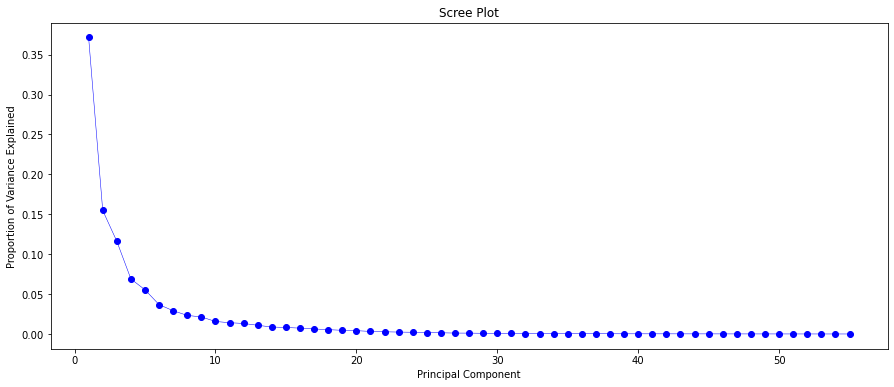

In [130]:
#Explained variance
pca = PCA().fit(scaled_euclid)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(15,6))
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=0.5, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [131]:
pca_thresholds = [0.5, 0.7, 0.8, 0.9, 0.95]
for i in range(len(pca_thresholds)):
    pca = PCA(pca_thresholds[i])
    pca.fit(scaled_euclid)
    print(pca_thresholds[i], pca.n_components_)

0.5 2
0.7 4
0.8 6
0.9 11
0.95 16
